# **Importing Libraries**

In [ ]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# **Mounting My Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Data_Sheet(.csv and .xlsx Formate)**

In [ ]:
df_auto = pd.read_csv("/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/CarPrice_Assignment.csv")
df_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [ ]:
df_stru = pd.read_excel("/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/Data Dictionary - carprices.xlsx")
df_stru.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN,nan,NaN
1,nan,nan,nan,nan,nan,nan,DATA DICTONARY,NaN,nan,nan,nan,NaN,nan,NaN


# **Data Observation**

In [ ]:
# shape of the data
df_auto.shape

(205, 26)

In [ ]:
# information of the data
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# description of the data
df_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


# **Checking Missing Vaules**

In [ ]:
df_auto.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# **Data Cleaning**

In [ ]:
# dropping car_ID 

df_auto = df_auto.drop('car_ID',axis=1)

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = df_auto.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

price        0.0000
carheight    0.0000
CarName      0.0000
fueltype     0.0000
aspiration   0.0000
dtype: float64

(205, 25)

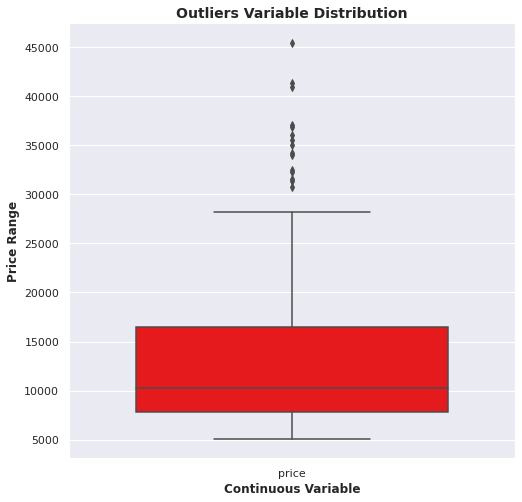

In [ ]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_auto[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df_auto.shape

In [ ]:
# Extracting Car Company from the CarName as per direction in Problem 

df_auto['CarName'] = df_auto['CarName'].str.split(' ',expand=True)

In [ ]:
# Unique Car company

df_auto['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

# **Typo Error in Car Company name**

* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw

In [ ]:
# Renaming the typo errors in Car Company names

df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df_auto['symboling'] = df_auto['symboling'].astype(str)

In [ ]:
# checking for duplicates

bool_series=df_auto.duplicated(keep=False) #Keep=False to take unique rows
#df_auto=df_auto[~bool_series] #Taking Unique rows in data Frame  

In [ ]:
df_auto

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [ ]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

# **Visualising the Data**

Text(0, 0.5, 'Count of Cars')

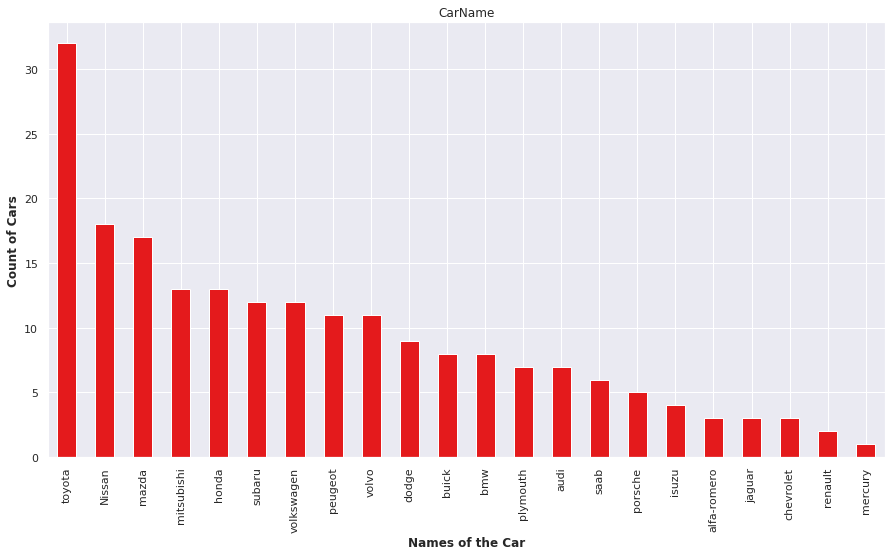

In [ ]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=df_auto['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

# **Visualizing the distribution of car prices**

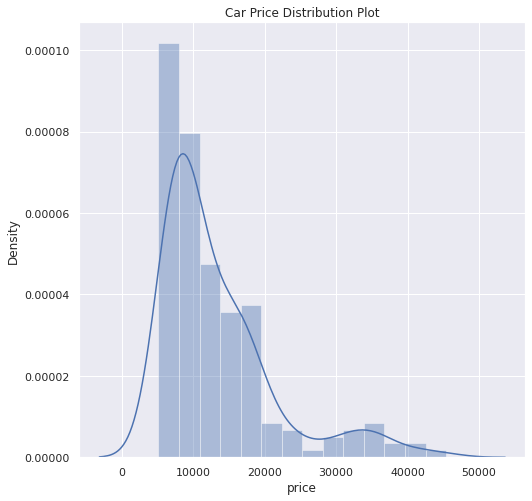

In [ ]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df_auto['price'])

# **Visualising Numeric Variables**
Pairplot of all the numeric variables

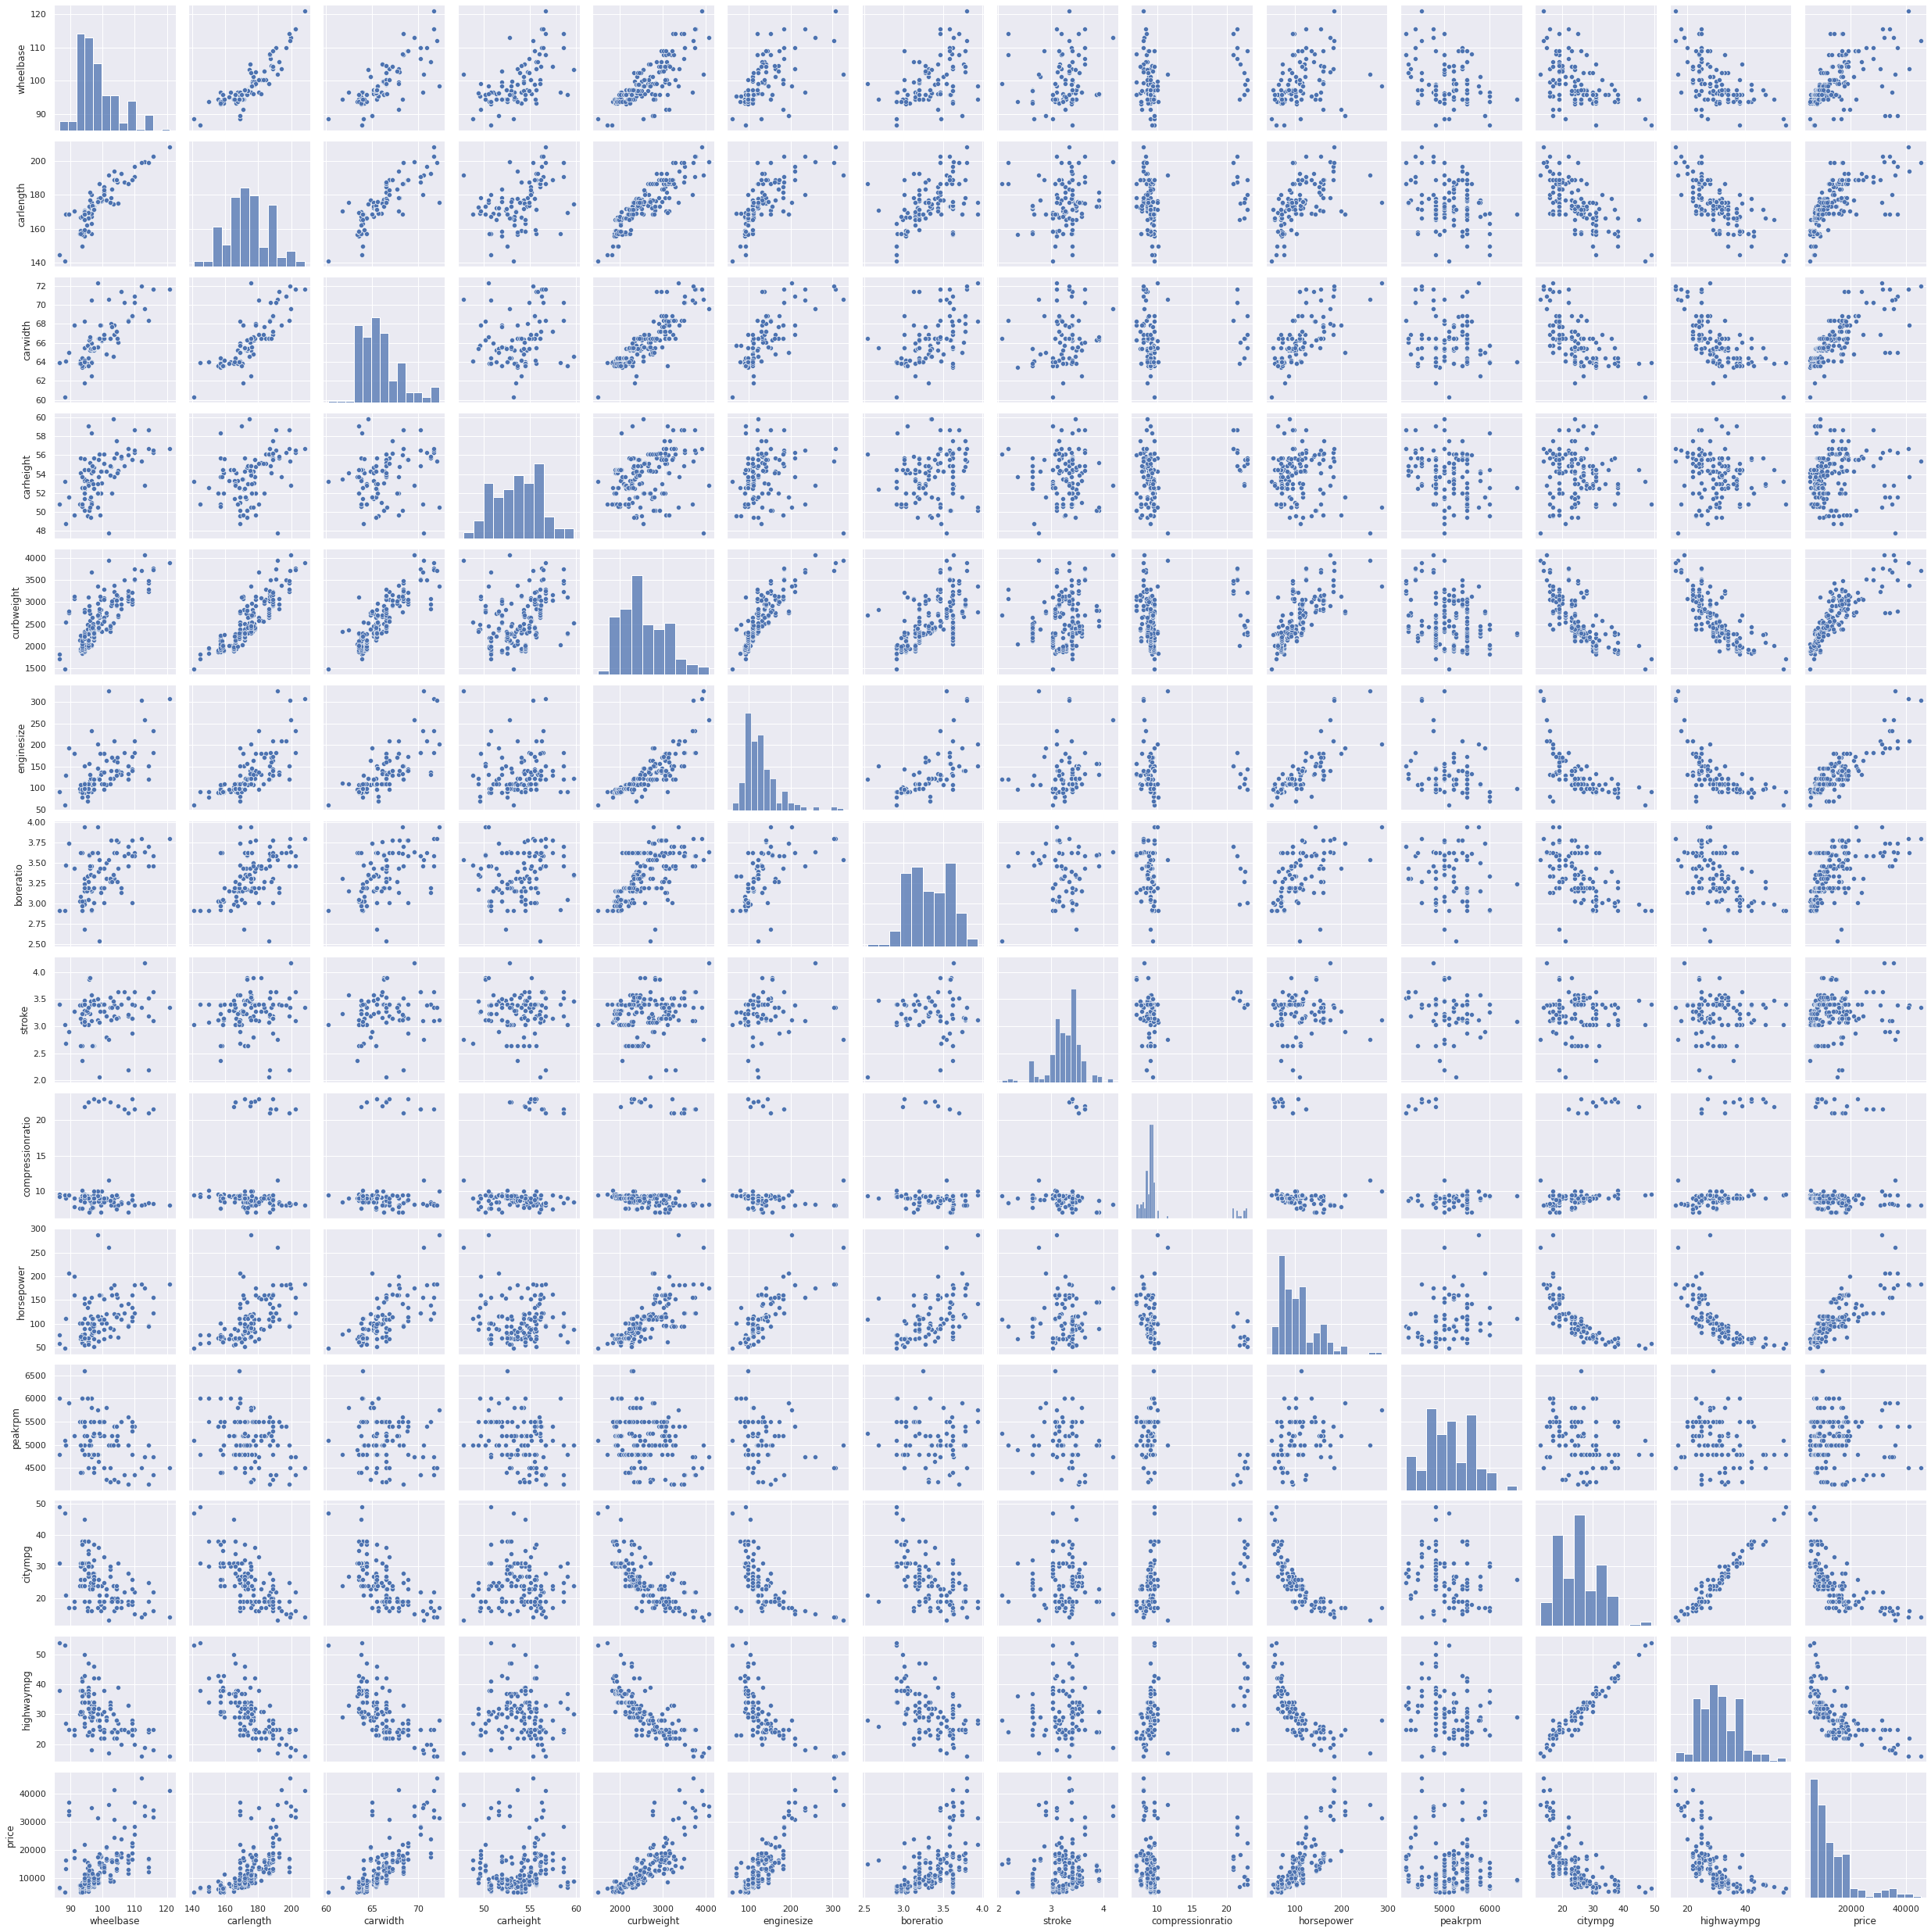

In [ ]:
ax = sns.pairplot(df_auto[num_col])

# **Visualising few more Categorical Variables**
Boxplot of all the categorical variables

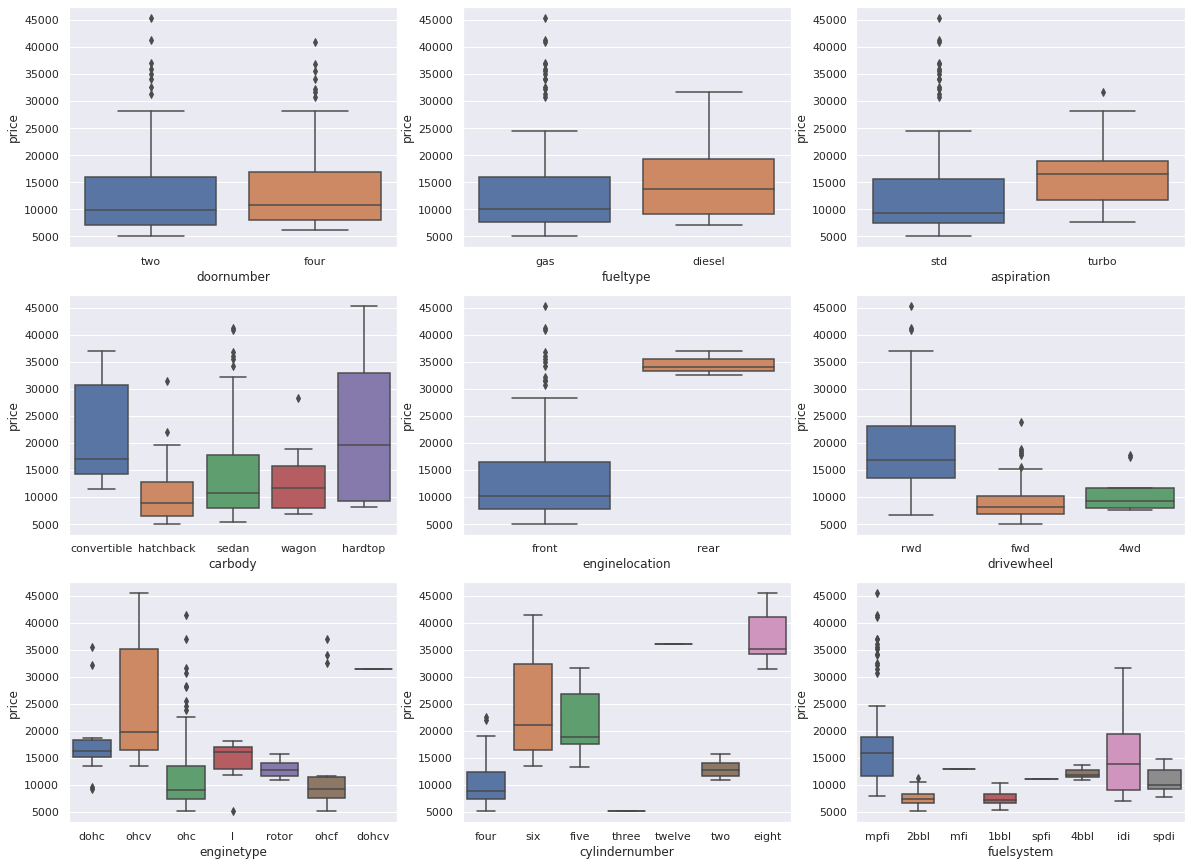

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_auto)
plt.show()

# **Frequency Count Hist Plot**

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

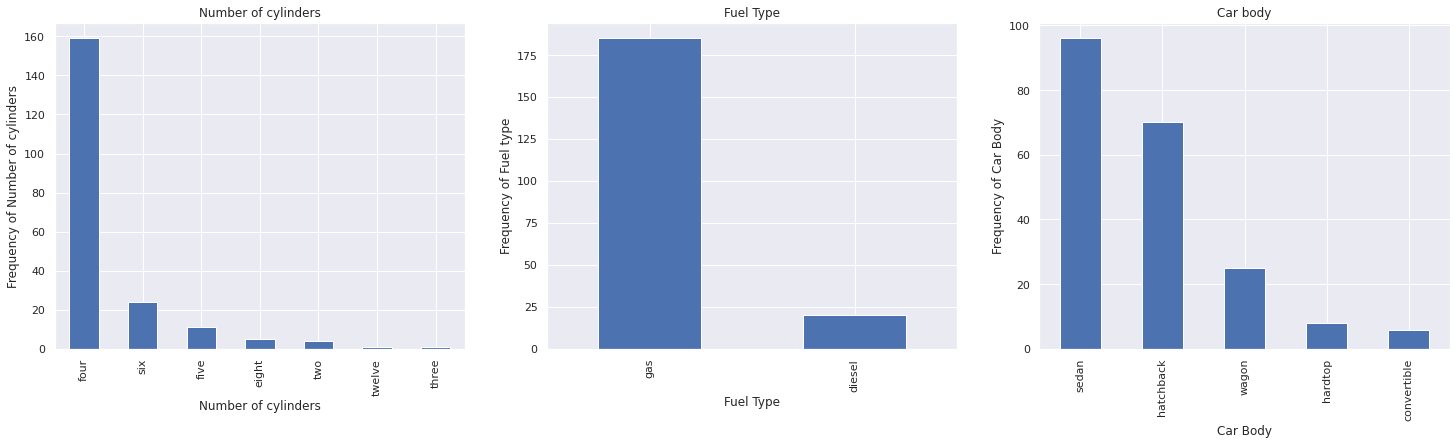

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_auto['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df_auto['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df_auto['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

# **Relationship between fuelsystem vs price with hue fueltype**

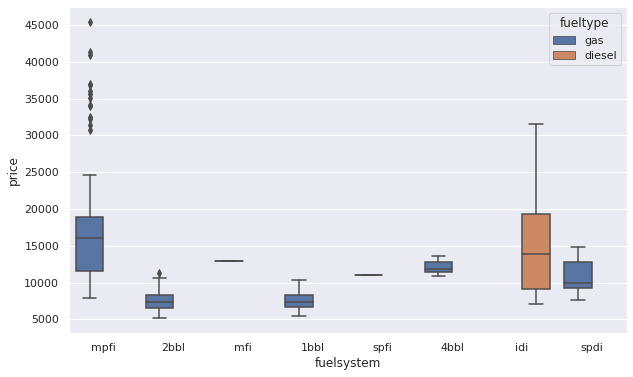

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df_auto)
plt.show()

# **Relationship between carbody vs price with hue enginelocation**

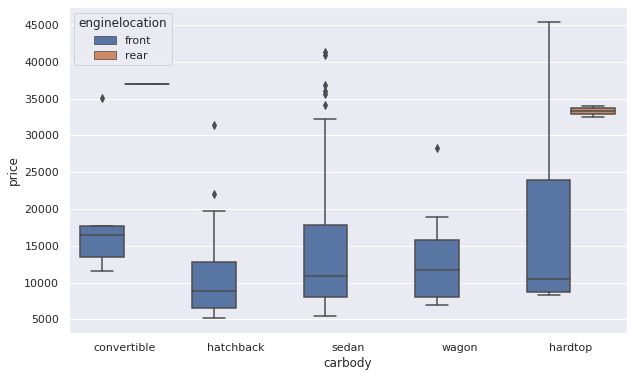

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df_auto)
plt.show()

# **Relationship between cylindernumber vs price with hue fueltype**

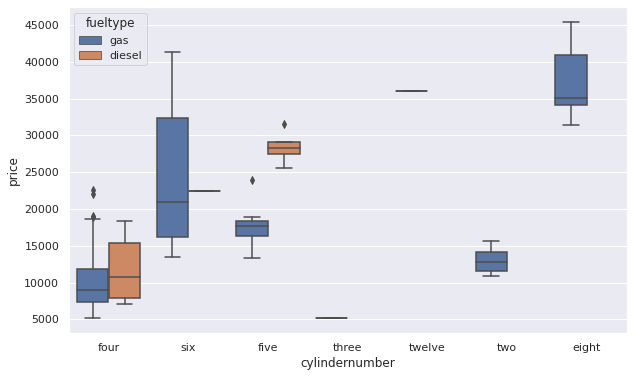

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df_auto)
plt.show()

# **Derived Metrices**
* Average Price

<Figure size 1440x432 with 0 Axes>

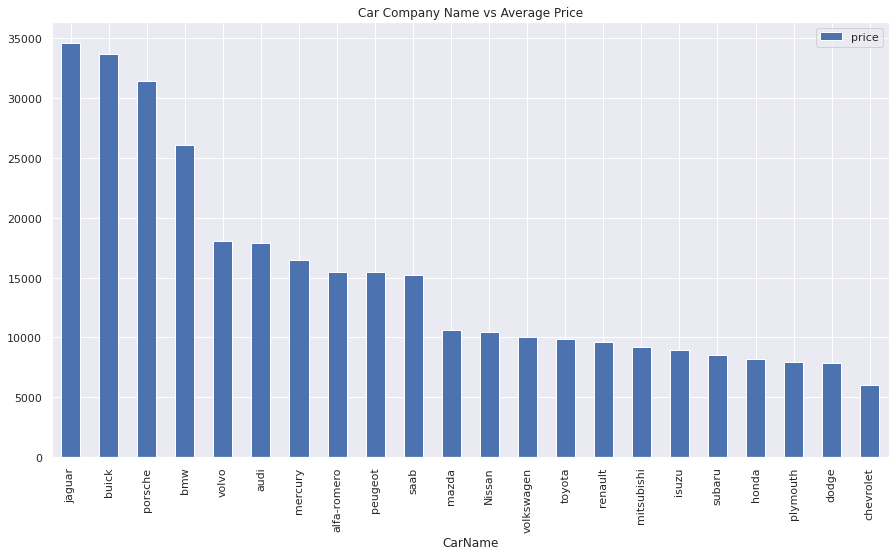

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df_auto.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

Jaguar,Buick and porsche seems to have the highest average price.

<Figure size 1440x432 with 0 Axes>

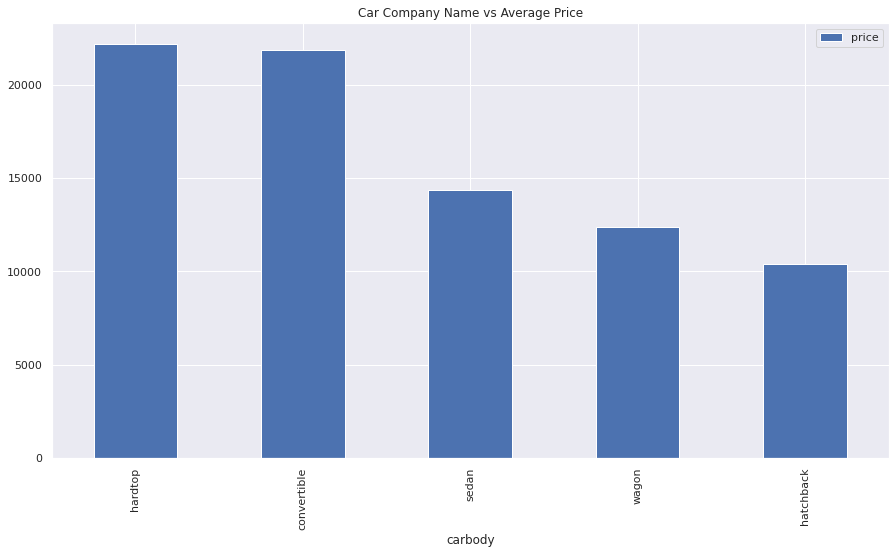

In [ ]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(df_auto.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

hardtop and convertible seems to have the highest average price.

In [ ]:
#Binning (arranging) the Car Companies based on avg prices of each car Company.

df_auto['price'] = df_auto['price'].astype('int')
df_auto_temp = df_auto.copy()
t = df_auto_temp.groupby(['CarName'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='CarName') #merge as per left(ie df_auto_temp) data frame
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df_auto['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df_auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


# **Significant variables after Visualization**
* Cars_Category , Engine Type, Fuel Type
* Car Body , Aspiration , Cylinder Number
* Drivewheel , Curbweight , Car Length
* Car Length , Car width , Engine Size
* Boreratio , Horse Power , Wheel base
* citympg , highwaympg , symboling

In [ ]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [ ]:
df_auto = df_auto[sig_col]
df_auto

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
1,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
2,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000
3,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000
4,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,Medium_Range,ohc,gas,std,sedan,four,rwd,109.1000,2952,141,3.7800,114,23,28,188.8000,68.9000
201,19045,Medium_Range,ohc,gas,turbo,sedan,four,rwd,109.1000,3049,141,3.7800,160,19,25,188.8000,68.8000
202,21485,Medium_Range,ohcv,gas,std,sedan,six,rwd,109.1000,3012,173,3.5800,134,18,23,188.8000,68.9000
203,22470,Medium_Range,ohc,diesel,turbo,sedan,six,rwd,109.1000,3217,145,3.0100,106,26,27,188.8000,68.9000


# **Data Preparation**

Dummy Variables
* The variable carbody has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

* For this, we will use something called dummy variables.

In [ ]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [ ]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df_auto[sig_cat_col]) 
dummies.shape

(205, 29)

In [ ]:
dummies = pd.get_dummies(df_auto[sig_cat_col], drop_first = True) 
dummies.shape

(205, 22)

In [ ]:
# Add the results to the original dataframe

df_auto = pd.concat([df_auto, dummies], axis = 1)

In [ ]:
# Drop the original cat variables as dummies are already created

df_auto.drop( sig_cat_col, axis = 1, inplace = True)
df_auto.shape

(205, 32)

# **Splitting the Data into Training and Testing Sets**
As we know, the first basic step for regression is performing a train-test split.

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93.7000,2191,98,2.9700,68,31,38,167.3000,63.8000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,22018,94.5000,2778,151,3.9400,143,19,27,168.9000,68.3000,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,9538,94.5000,2300,98,3.2400,112,26,29,168.7000,64.0000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,18950,104.3000,3157,130,3.6200,162,17,22,188.8000,67.2000,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


# **Rescaling the Features**
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

* Min-Max scaling
* Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [ ]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [ ]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.7002,-0.8118,-0.6421,-0.6602,-1.2973,-0.8729,0.8398,1.0254,-0.4872,-0.9245,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1.1519,-0.6772,0.4394,0.6378,2.4323,1.0218,-0.9570,-0.5575,-0.3598,1.1150,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.4522,-0.6772,-0.4413,-0.6602,-0.2592,0.2387,0.0911,-0.2697,-0.3757,-0.8339,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.4426,-1.6703,0.0156,0.1235,0.6251,0.2134,-0.6576,-0.5575,-0.3678,-0.7885,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.7576,0.9724,1.1377,0.1235,1.2019,1.5018,-1.2565,-1.2770,1.2254,0.6164,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


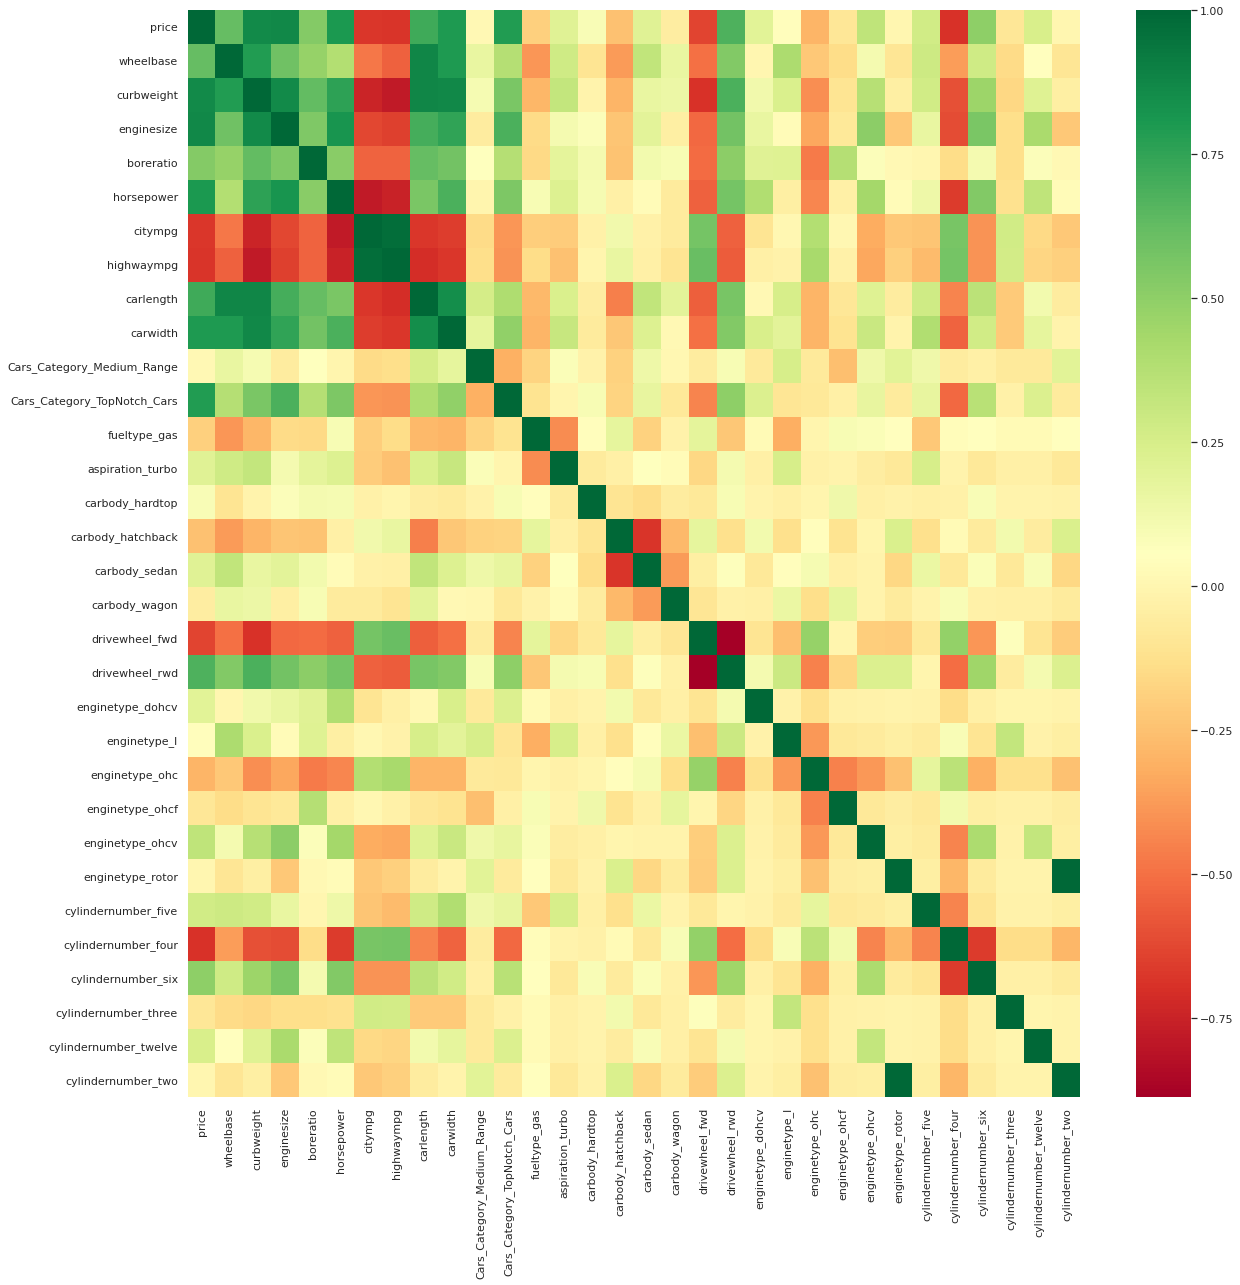

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

# **scatterplot for few correlated variables vs price.**

In [ ]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

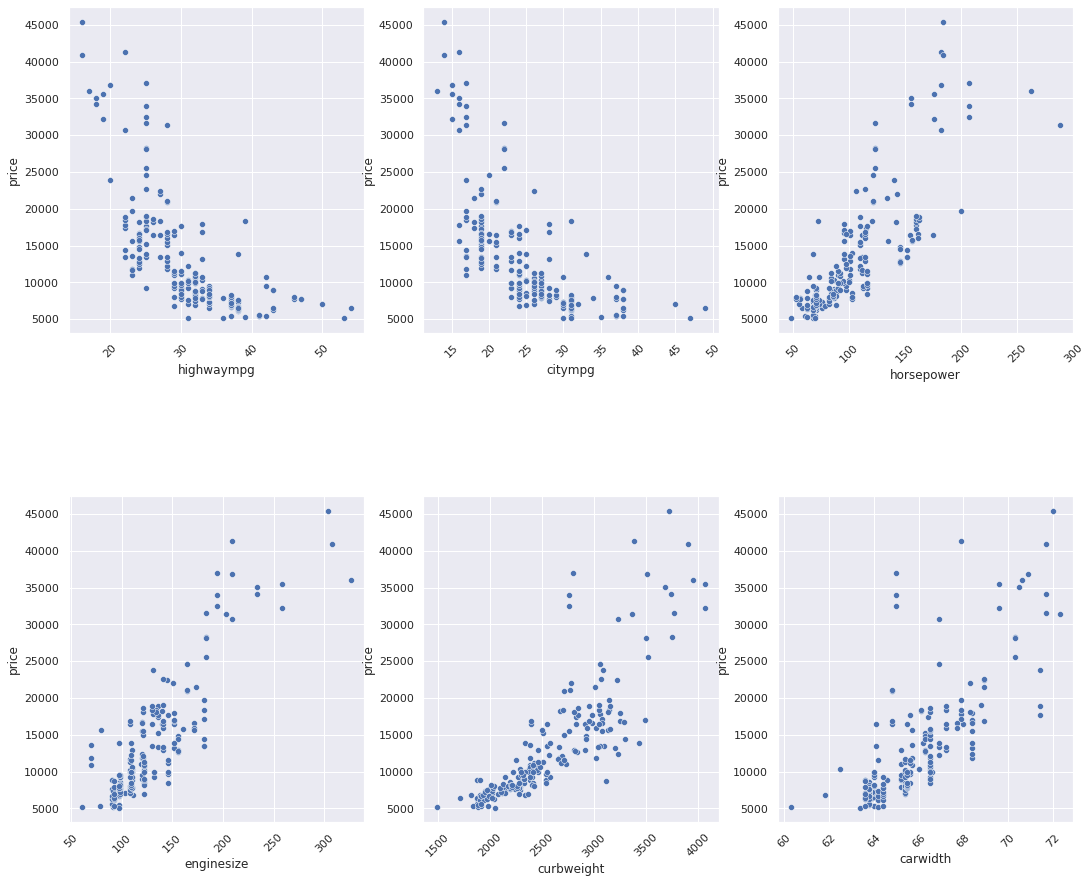

In [ ]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df_auto, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

# **Dividing into X and Y sets for the model building**

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

# **Building a Linear Model**

In [ ]:
X_train_1 = X_train['horsepower']

In [ ]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [ ]:
# Check parameters created

lr_1.params

const        0.0000
horsepower   0.8062
dtype: float64

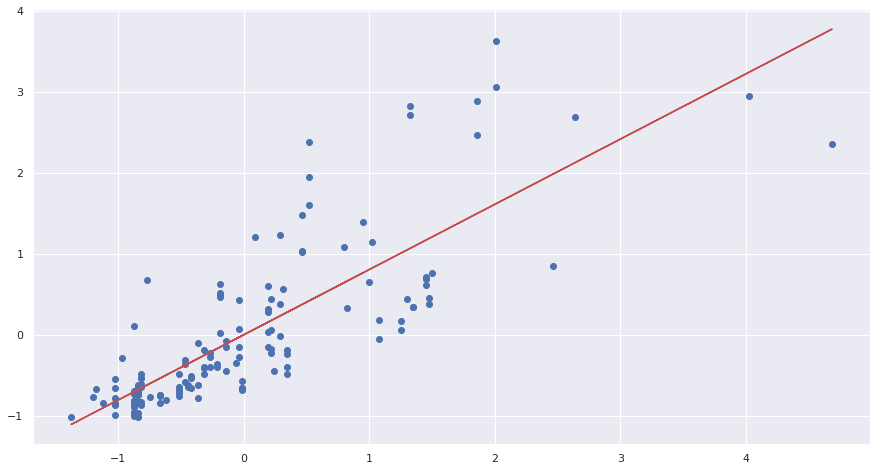

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           6.05e-34
Time:                        11:35:34   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.050   1.43e-15      1.0

# **Adding another variable**
The R-squared value obtained is 0.65. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. curbweight.

In [ ]:
X_train_2 = X_train[['horsepower', 'curbweight']]

# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()
lr_2.params

const        0.0000
horsepower   0.3581
curbweight   0.5898
dtype: float64

In [ ]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           3.34e-49
Time:                        11:35:34   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.038   1.87e-15      1.0

# **Adding another variable**
The R-squared value obtained is 0.797. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. enginesize.

In [ ]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()
lr_3.params

const        0.0000
horsepower   0.2288
curbweight   0.3938
enginesize   0.3400
dtype: float64

In [ ]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           2.16e-51
Time:                        11:35:35   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.204e-17      0.036   1.44e-15      1.0

# **We have achieved a R-squared of 0.819 by manually picking the highly correlated variables. Now lets use RFE to select the independent variables which accurately predicts the dependent variable price.**

# **RFE**
Let's use Recursive feature elimination since we have too many independent variables

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             
rfe = rfe.fit(X_train,y_train)


In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 14),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 16)]

In [ ]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [ ]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

* High p-value High VIF : Drop the variable
* High p-value Low VIF or Low p-value High VIF  
* Drop the variable with high p-value first
* Low p-value Low VIF : accept the variable

In [ ]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           3.41e-68
Time:                        11:35:35   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)
and we need to drop it

# **Checking VIF**
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

# **VIFi=1/(1-Ri^2)**

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.9200
6,carbody_sedan,9.7300
0,curbweight,9.0600
2,carwidth,6.2400
5,carbody_hatchback,6.1500
9,enginetype_ohc,5.9700
1,horsepower,5.6100
13,cylindernumber_six,4.7300
7,carbody_wagon,3.4800
11,cylindernumber_five,2.8200


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Dropping the variable and updating the model
Dropping cylindernumber_twelve beacuse its p-value is 0.393 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.16e-69
Time:                        11:35:35   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.2700
0,curbweight,9.0600
6,carbody_sedan,9.0500
2,carwidth,6.1500
5,carbody_hatchback,5.9500
9,enginetype_ohc,5.9200
1,horsepower,4.6900
13,cylindernumber_six,3.7000
7,carbody_wagon,3.3100
11,cylindernumber_five,2.6600


Dropping cylindernumber_six beacuse its p-value is 0.493 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.29e-70
Time:                        11:35:35   Log-Likelihood:                -6.8230
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,8.9900
0,curbweight,8.5300
2,carwidth,5.7200
9,enginetype_ohc,5.6500
6,carbody_sedan,5.2400
1,horsepower,4.5300
5,carbody_hatchback,3.7600
7,carbody_wagon,2.3600
3,Cars_Category_TopNotch_Cars,2.1300
11,cylindernumber_five,1.9700


Dropping carbody_hardtop beacuse its p-value is 0.238 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           6.73e-71
Time:                        11:35:35   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.5100
11,cylindernumber_four,8.0900
2,carwidth,5.6500
8,enginetype_ohc,5.6000
5,carbody_sedan,4.6400
1,horsepower,4.1700
4,carbody_hatchback,3.3100
6,carbody_wagon,2.2200
3,Cars_Category_TopNotch_Cars,2.0800
10,cylindernumber_five,1.9300


Dropping enginetype_ohc beacuse its p-value is 0.110 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.81e-71
Time:                        11:35:35   Log-Likelihood:                -9.0049
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.2500
10,cylindernumber_four,6.8000
2,carwidth,5.6500
5,carbody_sedan,4.3300
1,horsepower,4.1700
4,carbody_hatchback,3.1000
6,carbody_wagon,2.2000
3,Cars_Category_TopNotch_Cars,1.8300
9,cylindernumber_five,1.6300
7,enginetype_dohcv,1.5700


Dropping cylindernumber_five beacuse its p-value is 0.104 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.91e-72
Time:                        11:35:35   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.1000
9,cylindernumber_four,5.7600
2,carwidth,5.0800
1,horsepower,4.1300
5,carbody_sedan,3.5200
4,carbody_hatchback,2.6300
6,carbody_wagon,1.9400
3,Cars_Category_TopNotch_Cars,1.8300
7,enginetype_dohcv,1.5400
8,enginetype_ohcv,1.4300


Dropping enginetype_ohcv beacuse its p-value is 0.180 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           8.26e-73
Time:                        11:35:35   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.1000
8,cylindernumber_four,5.6600
2,carwidth,5.0800
1,horsepower,3.8100
5,carbody_sedan,3.3500
4,carbody_hatchback,2.4700
6,carbody_wagon,1.8900
3,Cars_Category_TopNotch_Cars,1.8100
7,enginetype_dohcv,1.4900


Dropping curbweight beacuse its VIF is 8.1 and we want VIF less than 5 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.86e-71
Time:                        11:35:35   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.6600
4,carbody_sedan,3.3500
0,horsepower,2.7200
3,carbody_hatchback,2.4000
1,carwidth,2.2200
2,Cars_Category_TopNotch_Cars,1.7300
5,carbody_wagon,1.7100
6,enginetype_dohcv,1.2400


Dropping cylindernumber_four beacuse its VIF is 5.66 and we want VIF less than 5 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.70e-70
Time:                        11:35:35   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.4500
1,carwidth,2.1200
2,Cars_Category_TopNotch_Cars,1.7000
4,carbody_sedan,1.2200
6,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000
5,carbody_wagon,1.0200


Lets drop carbody_sedan and see if there is any drastic fall in R squared.If not we can drop carbody sedan. Our aim is to explain the maximum variance with minimum variable.

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.68e-69
Time:                        11:35:35   Log-Likelihood:                -28.398
No. Observations:                 143   AIC:                             70.80
Df Residuals:                     136   BIC:                             91.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The R squared value just dropped by 0.005.Hence we can proceed with dropping carbody_sedan.

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.3100
1,carwidth,2.0800
2,Cars_Category_TopNotch_Cars,1.4600
5,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000
4,carbody_wagon,1.0200


Dropping carbody_wagon beacuse its p-value is 0.315 and we want p-value less than 0.05 and hence rebuilding the model

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.57e-70
Time:                        11:35:36   Log-Likelihood:                -28.930
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.2800
1,carwidth,2.0700
2,Cars_Category_TopNotch_Cars,1.4500
4,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000


Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model lm_rfe10 and lm_rfe8.

Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model lm_rfe10 and lm_rfe8.

Here, we are proposing Business 2 Models which can be used to predict the car prices.
# **MODEL I**
With lm_rfe10 which has basically 5 predictor variables.

# **Residual Analysis of the train data**
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

Text(0.5, 0, 'Errors')

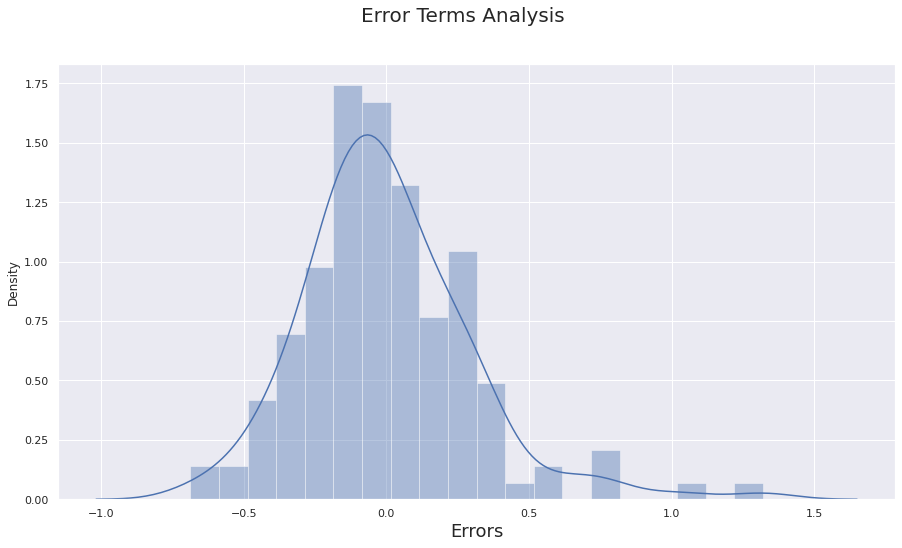

In [ ]:
# Predicting the price of training set.
y_train_price = lm_rfe10.predict(X_train_rfe10c)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

# **Making Predictions Using the Final Model**
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

# **Applying the scaling on the test sets**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

**Dividing test set into X_test and y_test**

In [ ]:
y_test = df_test.pop('price')
X_test = df_test
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe10c.columns]
# Making predictions using the final model
y_pred = lm_rfe10.predict(X_test_new)

# **Model Evaluation**
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

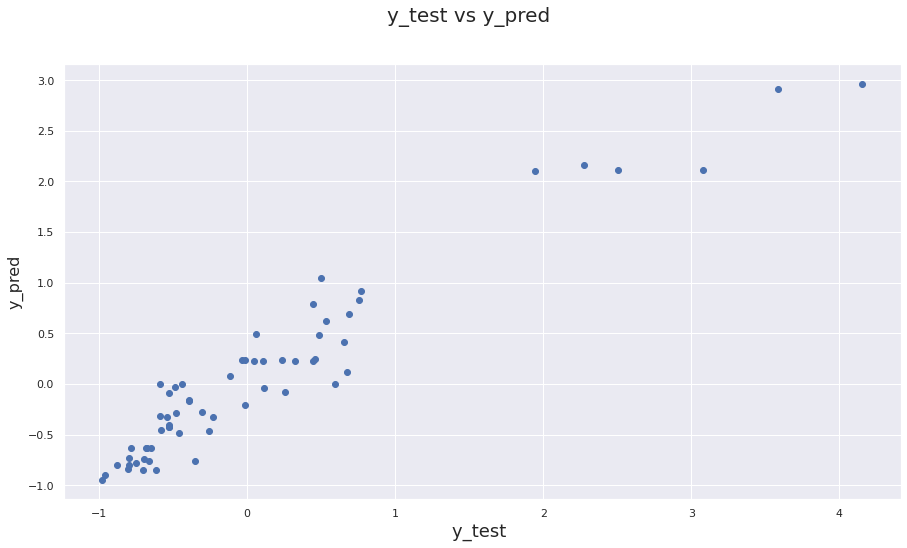

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

# **RMSE Score**

In [ ]:
r2_score(y_test, y_pred)

0.9094354289897943

The **R2** score of **Training set** is **0.912** and **Test set** is **0.909** which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables

* horsepower
* carwidth
* Cars_Category_TopNotch_Cars
* carbody_hatchback
* enginetype_dohcv

# **Equation of Line to predict the Car prices values**
*Carprice=−0.0925+0.3847×horsepower+0.3381×carwidth+1.3179×Carscategorytopnotchcars−0.1565×carbodyhatchback−1.5033×enginetypedohcv*

# **Model I Conclusions:**
* **R-sqaured** and **Adjusted R-squared** - **0.912 and 0.909 - 90%** variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 284.8 and 1.57e-70(approx. 0.0) - Model fit is significant and explained 90% variance is just not by chance.
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

# **MODEL II**
With **lm_rfe8** which has basically **7** predictor variables.

# **Residual Analysis of the train data**
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

Text(0.5, 0, 'Errors')

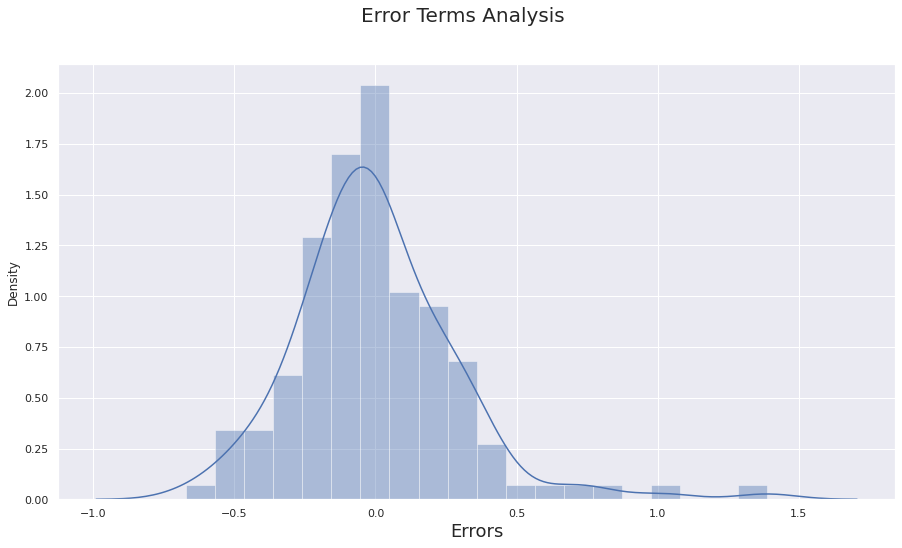

In [ ]:
# Predicting the price of training set.
y_train_price2 = lm_rfe8.predict(X_train_rfe8c)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price2), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

# **Making Predictions Using the Final Model**
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model.

In [ ]:
X_test_2 = X_test_1[X_train_rfe8c.columns]
# Making predictions using the final model
y_pred2 = lm_rfe8.predict(X_test_2)

# **Model Evaluation**
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred2')

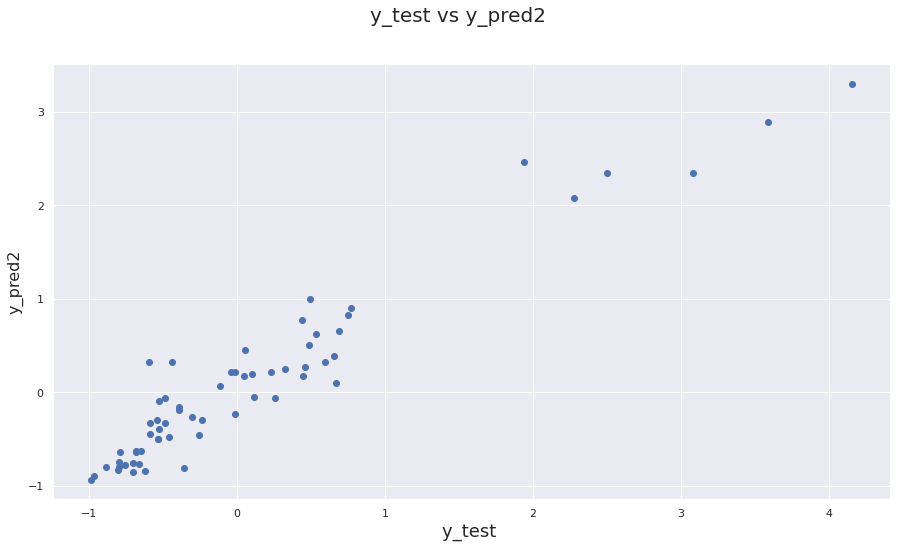

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16) 

# **RMSE Score**

In [ ]:
r2_score(y_test, y_pred2)

0.9153853722866508

The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables

* horsepower
* carwidth
* Cars_Category_TopNotch_Cars
* carbody_hatchback
* enginetype_dohcv
* carbody_sedan
* carbody_wagon

**Equation of Line to predict the Car prices values**
*Carprice=0.2440+0.3599×horsepower+0.3652×carwidth+1.2895×Carscategorytopnotchcars−0.4859×carbodyhatchback−1.4450×enginetypedohcv−0.3518×carbodysedan−0.4023×carbodywagon*

# **Model II Conclusions:**
* R-sqaured and Adjusted R-squared - 0.918 and 0.915 - 90% variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 215.9 and 4.70e-70(approx. 0.0) - Model fit is significant and explained 90%variance is just not by chance.
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all thepredictors are statistically significant.

**Closing Statement:**

Both the models are good enough to predict the carprices which explains the variance of data upto **90%** and the model is significant.

# **Pickling Models**

In [ ]:
import pickle
  
def storeData():
      
    # Its important to use binary mode
    sdbfile1 = open('model1.pkl', 'ab')
    sdbfile2 = open('model2.pkl', 'ab')
      
    # source, destination
    pickle.dump(lm_rfe10, sdbfile1)
    pickle.dump(lm_rfe8, sdbfile2) 
    sdbfile1.close()
    sdbfile2.close()
  
if __name__ == '__main__':
    storeData()